# Two-Body Problem

Notebook adapted from the "Orbit_Games" notebook by Professor Furnstahl. Submitted as second problem for the Final Problem Set in Physics 5300.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [3]:
class DoubleOrbit:
    """
    DoubleOrbit uses Lagrangians to solve the Two-Body Problem in cartesian coordinates.
    
    Parameters
    ----------
    G : float
        Newtonian Gravitational Constant
    mass1: float
        First orbiting body's mass
    mass2: float
        Second orbiting body's mass

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    
    def __init__(self, mass1 = 1.0, mass2 = 1.0, G = 1.0):
        self.G = G
        self.mass1 = mass1
        self.mass2 = mass2
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi_1/dt dphi_1dot/dt dphi_2/dt dphi_2dot/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            8-component vector with

            y[0] = x1,     y[1] = x_1dot

            y[2] = x2,     y[3] = x_2dot

            y[4] = y1,     y[5] = y_1dot

            y[6] = y2,     y[7] = y_2dot
            
        """
        
        x_1DoubleDot = -(self.G*self.mass2*(y[0]-y[2]))/(((y[0]-y[2])**2 + (y[4]-y[6])**2)**(3.0/2.0))
        x_2DoubleDot = (self.G*self.mass1*(y[0]-y[2]))/(((y[0]-y[2])**2 + (y[4]-y[6])**2)**(3.0/2.0))
        y_1DoubleDot = -(self.G*self.mass2*(y[4]-y[6]))/(((y[0]-y[2])**2 + (y[4]-y[6])**2)**(3.0/2.0))
        y_2DoubleDot = (self.G*self.mass1*(y[4]-y[6]))/(((y[0]-y[2])**2 + (y[4]-y[6])**2)**(3.0/2.0))
        
        return [y[1], x_1DoubleDot, y[3], x_2DoubleDot, y[5], y_1DoubleDot, y[7], y_2DoubleDot]
    
    
    def solve_ode(self, t_pts,x1_0,x_1dot0,x2_0,x_2dot0,y1_0,y_1dot0,y2_0,y_2dot0, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x1_0,x_1dot0,x2_0,x_2dot0,y1_0,y_1dot0,y2_0,y_2dot0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1, x_1dot, x2, x_2dot, y1, y_1dot, y2, y_2dot = solution.y
        return  x1, x_1dot, x2, x_2dot, y1, y_1dot, y2, y_2dot
    

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

#### Step 1
Labels for plots

In [5]:
x_vs_y_labels = (r'$x$', r'$y$')

### Step 2
Generate plot time

In [6]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.0
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#### Step 3
Define the parameters for our 2 Body System

In [7]:
# Model 
mass1 = 1.0
mass2 = 1.0
G = 10.0

#### Step 4
Instantiate our 2 Body System

In [8]:
p1 = DoubleOrbit(G=G, mass1=mass1, mass2=mass2)

#### Step 5
Determine out Initial Conditions

In [9]:
# Set ini't'l cond'ns
x1_0 = 1.0
x_1dot0 = 0.0
x2_0 = -1.0
x_2dot0 = 0.0
y1_0 = 0.0
y_1dot0 = 1.0
y2_0 = 0.0
y_2dot0 = -1.0

# feed initial cond'ns into pendulum, calculate pendulum data
x1,x_1dot, x2, x_2dot, y1, y_1dot, y2, y_2dot = p1.solve_ode(t_pts, \
                                                             x1_0, \
                                                             x_1dot0, 
                                                             x2_0, \
                                                             x_2dot0, \
                                                             y1_0, \
                                                             y_1dot0, \
                                                             y2_0, \
                                                             y_2dot0)
                                                             

#### Step 6
Now we can make our plot!

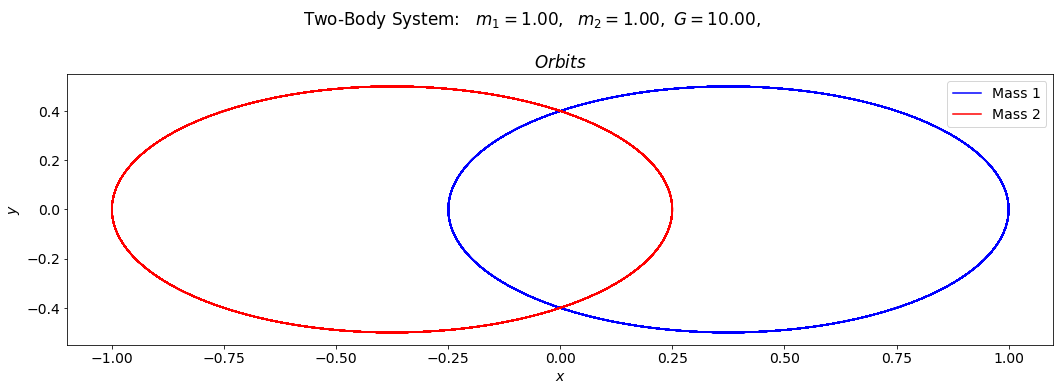

In [10]:
# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Two-Body System:  ' + \
                rf' $m_1 = {mass1:.2f},$' + \
                rf'  $m_2 = {mass2:.2f},$' + \
                rf' $G = {G:.2f},$' + \
                '\n'    # \n means a new line (adds some space here)

fig.suptitle(overall_title, va='baseline')
    
# first plot
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='blue',
            label='Mass 1', 
            title=r'$Orbits$', 
            ax=ax_a)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2[start : stop], y2[start : stop], 
            color='red',
            label='Mass 2',  
            ax=ax_a)


fig.tight_layout()
fig.savefig('TwoBodyProblem.png', bbox_inches='tight')  

### Part b
Show that the problem reduces to the orbits considered in class if one of the bodies is very heavy and you are in the rest frame

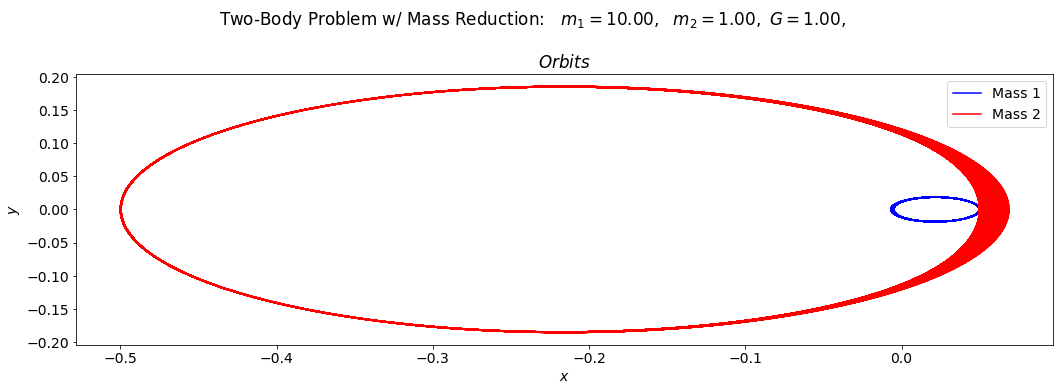

In [11]:
# Model 
mass1 = 10.0
mass2 = 1.0
G = 1.0

p2 = DoubleOrbit(G=G, mass1=mass1, mass2=mass2)

# Set ini't'l cond'ns
x1_0 = 0.05
x_1dot0 = 0.0
x2_0 = -(mass1 / mass2) * x1_0 #to keep in COM frame
x_2dot0 = -(mass1 / mass2) * x_1dot0
y1_0 = 0.0
y_1dot0 = 0.2
y2_0 = -(mass1/ mass2) * y1_0 #to keep in COM frame
y_2dot0 = -(mass1 / mass2) * y_1dot0

# feed initial cond'ns into pendulum, calculate pendulum data
x1,x_1dot, x2, x_2dot, y1, y_1dot, y2, y_2dot = p2.solve_ode(t_pts, \
                                                             x1_0, \
                                                             x_1dot0, 
                                                             x2_0, \
                                                             x_2dot0, \
                                                             y1_0, \
                                                             y_1dot0, \
                                                             y2_0, \
                                                             y_2dot0)
                                                             
# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Two-Body Problem w/ Mass Reduction:  ' + \
                rf' $m_1 = {mass1:.2f},$' + \
                rf'  $m_2 = {mass2:.2f},$' + \
                rf' $G = {G:.2f},$' + \
                '\n'    # \n means a new line (adds some space here)

fig.suptitle(overall_title, va='baseline')
    
# first plot
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1[start : stop], y1[start : stop], 
            axis_labels=x_vs_y_labels, 
            color='blue',
            label='Mass 1', 
            title=r'$Orbits$', 
            ax=ax_a)
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2[start : stop], y2[start : stop], 
            color='red',
            label='Mass 2',  
            ax=ax_a)


fig.tight_layout()
fig.savefig('TwoBodyProblemPartb.png', bbox_inches='tight')  